In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

import random
import seaborn as sns
pd.options.display.max_rows=300
pd.set_option('display.max_columns', None)

# MIMIC

In [ ]:
df_type = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/01.MIMICIV_SAKI_trajCluster/df_mixAK_fea4_C3.csv")
df_type_filt = df_type.loc[:,["stay_id","groupHPD"]]
df_type_filt = df_type_filt.drop_duplicates()
all_lst = df_type_filt.stay_id.unique().tolist()
print("Number of included patients:",len(all_lst))

df_type_filt["groupHPD"].value_counts()

In [3]:
df_bt_at = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/06.fluid_resuscitation/01.mimic/df_diuretic_responsitive.csv")
df_bt_at = df_bt_at[["stay_id","label_diu_res"]]

df_lifesupport = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/00.data_mimic/treatment/lifesupport.csv")
df_lifesupport = pd.merge(df_type_filt, df_lifesupport, how="left", on = "stay_id")
df_lifesupport = df_lifesupport.fillna(0)
df_lifesupport = pd.merge(df_lifesupport, df_bt_at, how="left", on = "stay_id")
df_lifesupport.head()

,stay_id,groupHPD,is_vaso,is_mv,is_rrt,is_crrt,label_diu_res
0,30003598,1,0.0,1.0,0.0,0.0,responsive
1,30004144,2,0.0,1.0,0.0,0.0,responsive
2,30005085,2,0.0,1.0,0.0,0.0,responsive
3,30006983,2,0.0,1.0,0.0,0.0,responsive
4,30008148,2,0.0,1.0,0.0,0.0,responsive


In [4]:
df_stat = df_lifesupport.groupby(['groupHPD', 'label_diu_res']).mean()[['is_vaso', 'is_mv', 'is_rrt', 'is_crrt']] * 100
df_stat = df_stat.reset_index()
map_dict = {"responsive":"Diuretic responsive group","Non-responsive": "Diuretic non-responsive group","No diuretic":"No diuretic group"}
df_stat["label_diu_res"] = df_stat["label_diu_res"].map(map_dict)

fixed_order1 = [2,1,3]
fixed_order2 = ["Diuretic responsive group","Diuretic non-responsive group","No diuretic group"]
df_stat['groupHPD'] = pd.Categorical(df_stat['groupHPD'], categories=fixed_order1, ordered=True)
df_stat['label_diu_res'] = pd.Categorical(df_stat['label_diu_res'], categories=fixed_order2, ordered=True)
df_stat = df_stat.sort_values(by=['groupHPD', 'label_diu_res'])
df_stat

,groupHPD,label_diu_res,is_vaso,is_mv,is_rrt,is_crrt
5,2,Diuretic responsive group,10.165340,99.387630,0.489896,0.306185
4,2,Diuretic non-responsive group,6.635071,97.630332,1.421801,0.947867
3,2,No diuretic group,4.789430,91.907514,0.330306,0.247729
2,1,Diuretic responsive group,22.005571,99.303621,3.760446,3.203343
1,1,Diuretic non-responsive group,19.565217,98.913043,8.152174,8.152174
0,1,No diuretic group,15.909091,92.171717,4.545455,4.292929
8,3,Diuretic responsive group,37.804878,98.780488,18.292683,14.634146
7,3,Diuretic non-responsive group,45.217391,100.000000,42.608696,40.869565
6,3,No diuretic group,46.012270,95.092025,17.791411,14.723926


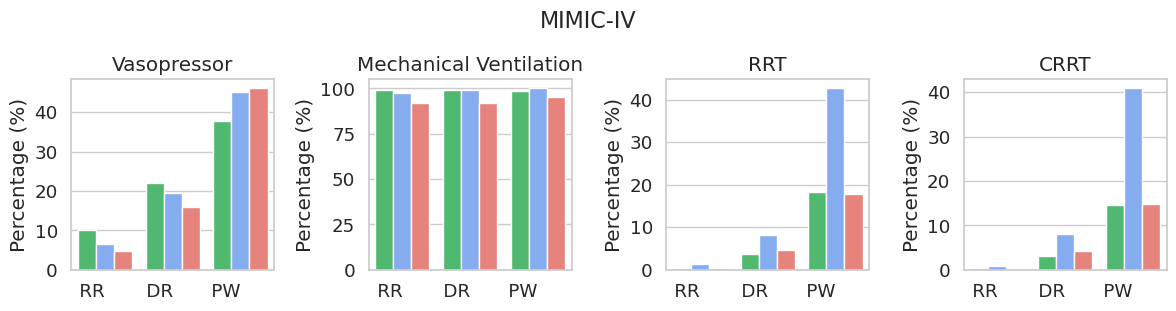

In [ ]:
df = df_stat
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
color_palette = ["#3fc968" ,"#74a8ff","#f8746a"] #sns.color_palette("pastel")
map_dict= {1:2,2:1,3:3}
df["groupHPD1"] = df["groupHPD"].map(map_dict)

# Draw subgraphs1 - is_vaso
sns.barplot(x='groupHPD', y='is_vaso', hue='label_diu_res', data=df, ax=axes[0], palette=color_palette)
axes[0].set_title('Vasopressor')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_xlabel("")
axes[0].legend().set_visible(False)
# Draw subgraphs2 - is_mv
sns.barplot(x='groupHPD', y='is_mv', hue='label_diu_res', data=df, ax=axes[1], palette=color_palette)
axes[1].set_title('Mechanical Ventilation')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel("")
axes[1].legend().set_visible(False)

# Draw subgraphs3 - is_rrt
sns.barplot(x='groupHPD', y='is_rrt', hue='label_diu_res', data=df, ax=axes[2], palette=color_palette)
axes[2].set_title('RRT')
axes[2].set_ylabel('Percentage (%)')
axes[2].set_xlabel("")
axes[2].legend().set_visible(False)

# Draw subgraphs4 - is_crrt
sns.barplot(x='groupHPD', y='is_crrt', hue='label_diu_res', data=df, ax=axes[3], palette=color_palette)
axes[3].set_title('CRRT')
axes[3].set_ylabel('Percentage (%)')
axes[3].set_xlabel("")
axes[3].legend().set_visible(False)
plt.suptitle("MIMIC-IV", y=0.95, fontsize=16)

# Rotate the X-axis label
for ax in axes.flat:
    ax.set_xticklabels(["     RR","     DR","     PW"],  ha='right')
plt.tight_layout()
# plt.legend(bbox_to_anchor=(0.1, -0.15), loc='upper center', ncol=3, frameon=False)
plt.subplots_adjust(bottom=0.3)
plt.show()


# AUMC

In [ ]:
df_type = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/02.AUMCdb_SAKI_trajCluster/df_mixAK_fea3_C3_aumc.csv")
df_type_filt = df_type.loc[:,["stay_id","groupHPD"]]
df_type_filt = df_type_filt.drop_duplicates()
all_lst = df_type_filt.stay_id.unique().tolist()
print("Number of included patients:",len(all_lst))

df_type_filt["groupHPD"].value_counts()

In [7]:
df_bt_at = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/06.fluid_resuscitation/02.aumc/df_diuretic_responsitive.csv")
df_bt_at = df_bt_at[["stay_id","label_diu_res"]]

df_lifesupport = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/00.data_aumc/treatment/aumcdb_lifesupport.csv")
df_lifesupport = pd.merge(df_type_filt, df_lifesupport, how="left", on = "stay_id")
df_lifesupport = df_lifesupport.fillna(0)
df_lifesupport = pd.merge(df_lifesupport, df_bt_at, how="inner", on = "stay_id")
#df_lifesupport["is_crrt"] = df_lifesupport["is_rrt"]
df_lifesupport.head(1)

,stay_id,groupHPD,is_vaso,is_mv,is_rrt,is_crrt,label_diu_res
0,5,2,1.0,1.0,0.0,0.0,responsive


In [8]:
df_stat = df_lifesupport.groupby(['groupHPD', 'label_diu_res']).mean()[['is_vaso', 'is_mv', 'is_rrt', 'is_crrt']] * 100
df_stat = df_stat.reset_index()
map_dict = {"responsive":"Diuretic responsive group","Non-responsive": "Diuretic non-responsive group","No diuretic":"No diuretic use group"}
df_stat["label_diu_res"] = df_stat["label_diu_res"].map(map_dict)

fixed_order1 = [2,1,3]
fixed_order2 = ["Diuretic responsive group","Diuretic non-responsive group","No diuretic use group"]
df_stat['groupHPD'] = pd.Categorical(df_stat['groupHPD'], categories=fixed_order1, ordered=True)
df_stat['label_diu_res'] = pd.Categorical(df_stat['label_diu_res'], categories=fixed_order2, ordered=True)
df_stat = df_stat.sort_values(by=['groupHPD', 'label_diu_res'])
df_stat

,groupHPD,label_diu_res,is_vaso,is_mv,is_rrt,is_crrt
5,2,Diuretic responsive group,88.831836,97.432606,1.540436,0.256739
4,2,Diuretic non-responsive group,89.204545,97.727273,6.250000,3.977273
3,2,No diuretic use group,68.089888,88.314607,1.797753,1.348315
2,1,Diuretic responsive group,92.182410,94.788274,20.846906,9.120521
1,1,Diuretic non-responsive group,94.202899,94.927536,44.927536,21.739130
0,1,No diuretic use group,74.789916,87.394958,22.689076,15.126050
8,3,Diuretic responsive group,93.846154,100.000000,33.846154,13.846154
7,3,Diuretic non-responsive group,94.871795,98.717949,35.897436,28.205128
6,3,No diuretic use group,96.052632,97.368421,34.210526,22.368421


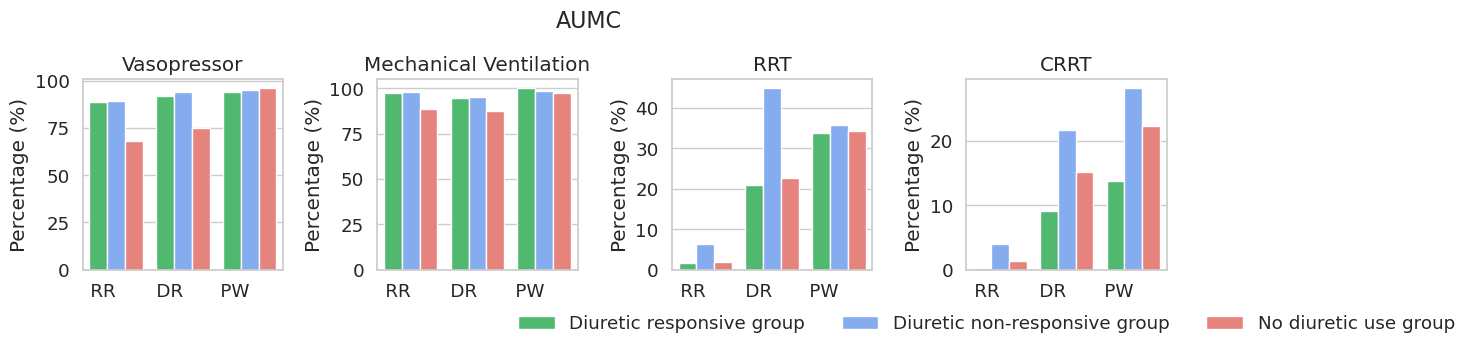

In [ ]:
df = df_stat
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
color_palette = ["#3fc968" ,"#74a8ff","#f8746a"] #sns.color_palette("pastel")
map_dict= {1:2,2:1,3:3}
df["groupHPD1"] = df["groupHPD"].map(map_dict)

# Draw subgraphs1 - is_vaso
sns.barplot(x='groupHPD', y='is_vaso', hue='label_diu_res', data=df, ax=axes[0], palette=color_palette)
axes[0].set_title('Vasopressor')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_xlabel("")
axes[0].legend().set_visible(False)
# Draw subgraphs2 - is_mv
sns.barplot(x='groupHPD', y='is_mv', hue='label_diu_res', data=df, ax=axes[1], palette=color_palette)
axes[1].set_title('Mechanical Ventilation')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel("")
axes[1].legend().set_visible(False)

# Draw subgraphs3 - is_rrt
sns.barplot(x='groupHPD', y='is_rrt', hue='label_diu_res', data=df, ax=axes[2], palette=color_palette)
axes[2].set_title('RRT')
axes[2].set_ylabel('Percentage (%)')
axes[2].set_xlabel("")
axes[2].legend().set_visible(False)

# Draw subgraphs4 - is_crrt
sns.barplot(x='groupHPD', y='is_crrt', hue='label_diu_res', data=df, ax=axes[3], palette=color_palette)
axes[3].set_title('CRRT')
axes[3].set_ylabel('Percentage (%)')
axes[3].set_xlabel("")
axes[3].legend().set_visible(False)
plt.suptitle("AUMC", y=0.95, fontsize=16)

# Rotate the X-axis label
for ax in axes.flat:
    ax.set_xticklabels(["     RR","     DR","     PW"],  ha='right')
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.1, -0.15), loc='upper center', ncol=3, frameon=False)
plt.subplots_adjust(bottom=0.3)
plt.show()
